Dice game
---

Peter has nine four-sided (pyramidal) dice, each with faces numbered $1, 2, 3, 4$.
Colin has six six-sided (cubic) dice, each with faces numbered $1,2,3,4,5,6$.

Peter and Colin roll their dice and compare totals: the highest total wins. The result is a draw if the totals are equal.

What is the probability that Pyramidal Peter beats Cubic Colin? Give your answer rounded to seven decimal places in the form 0.abcdefg.



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [2]:
seed  = 2023
rng = np.random.default_rng(seed)

def roll_cubic(return_sum = True, rng = rng):
    """
    roll Colin's six 6-sided dice.
    """
    rolls = rng.choice([1,2,3,4,5,6],6)
    if return_sum:
        return rolls.sum()
    else:
        return rolls
    
def roll_pyram(return_sum = True,   rng = rng):
    """
    roll Peter's nine 4-sided dice.
    """
    rolls = rng.choice([1,2,3,4], 9)
    if return_sum:
        return rolls.sum()
    else:
        return rolls

In [3]:
n4 = 4
dice_4 = list(range(1,5))
n6 = 6
dice_6 = list(range(1,7))
std_6 = np.std(dice_6)
std_4 = np.std(dice_4)
mu_6 = np.mean(dice_6)
mu_4 = np.mean(dice_4)

In [4]:
num_trials = 100_000
results = np.array([
    roll_cubic()
    for trial in range(num_trials)
])

# central limit theorem

For a collection of samples taken from distribution $X$, 

The mean of the distribution of the sums will be the mean of the original distribution. For D4, it's 2.5. For D6, it's 3.5.

The std of the distribution of the sums will be the std ofe the original distribution divided by sqrt(n).

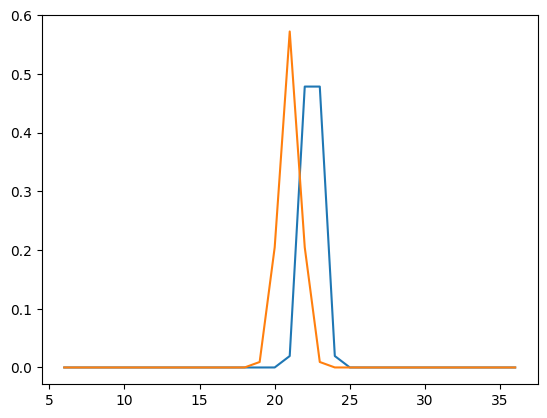

In [56]:
num_trials = 100_000

dist_4 = sp.stats.norm(mu_4*9, std_4/np.sqrt(4))
dist_6 = sp.stats.norm(mu_6*6, std_6/np.sqrt(6))

x = range(6,37)
plt.plot(x, dist_4.pdf(x))
plt.plot(x, dist_6.pdf(x))

In [15]:
all_dice_4_results = [
    sum([a,b,c,d,e,f,g,h,i])
    for a in dice_4
    for b in dice_4
    for c in dice_4
    for d in dice_4
    for e in dice_4
    for f in dice_4
    for h in dice_4
    for g in dice_4
    for i in dice_4
]
all_dice_6_results = [
    sum([a,b,c,d,e,f])
    for a in dice_6
    for b in dice_6
    for c in dice_6
    for d in dice_6
    for e in dice_6
    for f in dice_6
]

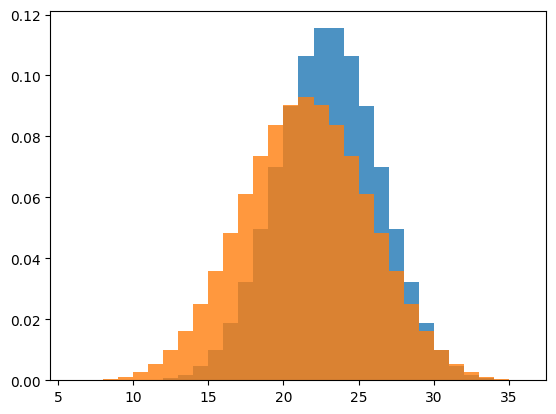

In [23]:
values4, bins, _ = plt.hist(all_dice_4_results, bins = range(6,37), density = True, alpha = 0.8)
values6, bins, _= plt.hist(all_dice_6_results, bins = range(6,37), density = True, alpha = 0.8)
plt.show()

In [24]:
values4

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.81469727e-06,
       3.43322754e-05, 1.71661377e-04, 6.29425049e-04, 1.85394287e-03,
       4.60052490e-03, 9.91058350e-03, 1.88827515e-02, 3.22380066e-02,
       4.97856140e-02, 7.00035095e-02, 9.00535583e-02, 1.06338501e-01,
       1.15493774e-01, 1.15493774e-01, 1.06338501e-01, 9.00535583e-02,
       7.00035095e-02, 4.97856140e-02, 3.22380066e-02, 1.88827515e-02,
       9.91058350e-03, 4.60052490e-03, 1.85394287e-03, 6.29425049e-04,
       1.71661377e-04, 3.81469727e-05])

In [27]:
wins_so_far = 0
for index in range(len(values6)):
    wins_so_far += values6[index] * sum(values4[(index+1):])
wins_so_far

0.5731440762924069